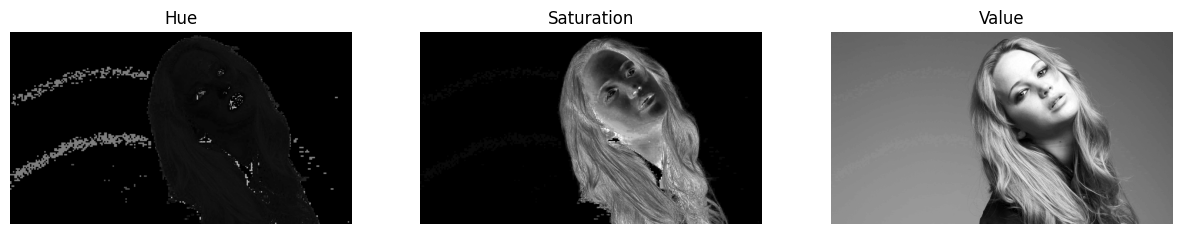

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"a1images/a1images/jeniffer.jpg")
HSV_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
H , S , V = cv.split(HSV_img)

#dislay the planes in gray scale
fig , ax = plt.subplots(1,3 , figsize=(15,15))
ax[0].imshow(H, cmap='gray' , vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis('off')
ax[1].imshow(S, cmap='gray' , vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis('off')
ax[2].imshow(V, cmap='gray' , vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis('off')

plt.show()

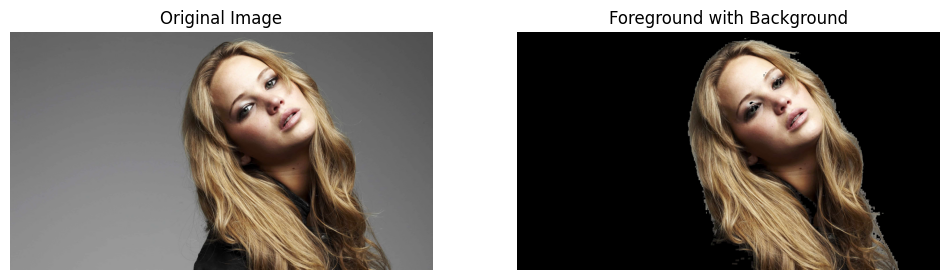

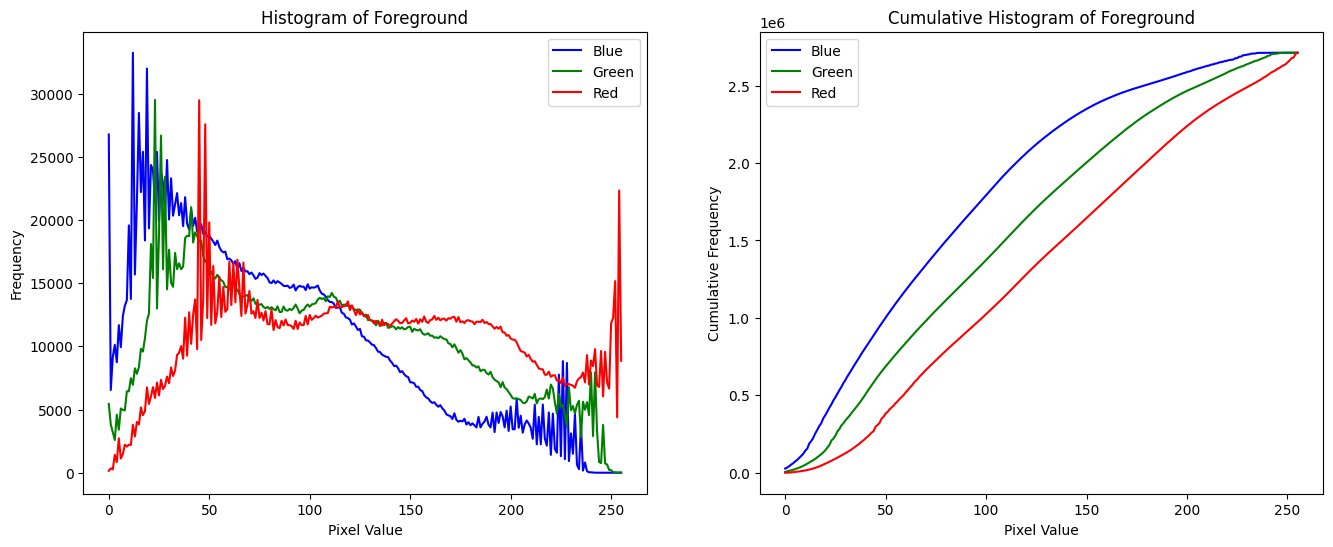

In [6]:
# Saturated plane selected to extract the foreground.
treshold = 13
_, mask = cv.threshold(S, treshold, 255, cv.THRESH_BINARY)

# Extract the foreground using bitwise_and and the mask
foreground = cv.bitwise_and(img, img, mask=mask)

foreground_hist_B = cv.calcHist([foreground], [0], mask, [256], [0, 256])
foreground_hist_G = cv.calcHist([foreground], [1], mask, [256], [0, 256])
foreground_hist_R = cv.calcHist([foreground], [2], mask, [256], [0, 256])

cumulative_hist_B = np.cumsum(foreground_hist_B)
cumulative_hist_G = np.cumsum(foreground_hist_G)
cumulative_hist_R = np.cumsum(foreground_hist_R)

# Display the original image and the result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
ax[1].set_title('Foreground with Background')
ax[1].axis('off')
plt.show()

# Display the histograms and cumulative histograms 
fig, ax = plt.subplots(1, 2, figsize=(16, 6))  

# Plot the histograms on the left subplot (ax1)
ax[0].plot(foreground_hist_B, color='blue', label='Blue')
ax[0].plot(foreground_hist_G, color='green', label='Green')
ax[0].plot(foreground_hist_R, color='red', label='Red')
ax[0].set_title('Histogram of Foreground')
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')
ax[0].legend()


ax[1].plot(cumulative_hist_B, color='blue', label='Blue')
ax[1].plot(cumulative_hist_G, color='green', label='Green')
ax[1].plot(cumulative_hist_R, color='red', label='Red')
ax[1].set_title('Cumulative Histogram of Foreground')
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Cumulative Frequency')
ax[1].legend()

 
plt.show()


